<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_Multilayer_perceptron_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import dataset


In [ ]:
cred_data1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraudTest.csv")

cred_data1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
#take only certain samples
df=cred_data1.sample(50000)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
479216,479216,2020-12-14 22:03:30,377550167323848,fraud_Kuhn LLC,misc_net,777.27,Kevin,Walters,M,87227 Tapia Burgs,...,44.0948,-70.2390,23045,Tourist information centre manager,1958-09-02,4e76831c0f67f28787859cfd6d9be55a,1387058610,43.428598,-69.752895,1
524033,524033,2020-12-25 00:01:32,180072527505094,fraud_Gislason Group,misc_pos,9.03,Cody,Miller,M,25748 John Wells,...,35.5840,-80.8685,69793,Control and instrumentation engineer,1953-12-08,c19bec9e304347b141884cd3abd83fc6,1387929692,36.294656,-80.058772,0
432372,432372,2020-12-05 00:19:40,345933964507467,fraud_Kiehn Inc,grocery_pos,111.98,Carol,Dillon,F,27479 Reeves Dale,...,38.4121,-75.2811,718,Regulatory affairs officer,1985-03-19,ecbafd880c00add099888cbfe8d5bd51,1386202780,39.235598,-75.392147,0
48574,48574,2020-07-07 16:14:50,3582754887089201,fraud_Romaguera Ltd,health_fitness,76.02,Terrance,Mckinney,M,42965 Christopher Fords Suite 659,...,34.4596,-93.6743,1383,Magazine features editor,1966-08-08,9bc1a2a9f4008e1704607508934dd098,1373213690,35.377257,-93.086389,0
475648,475648,2020-12-14 10:27:18,4492491748959010,fraud_Eichmann-Russel,misc_pos,41.79,Jonathan,Byrd,M,5554 Mack Meadows,...,37.3752,-81.6539,337,Advice worker,1986-10-17,773b720a80caa7237f69358114743fe3,1387016838,36.989755,-80.674541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454706,454706,2020-12-09 05:18:36,377026671291680,fraud_Miller-Harris,misc_net,5.38,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,37.3272,-91.0243,241,Investment analyst,1974-10-27,ef69191ea64597214f15d03fdb7af73a,1386566316,37.133588,-91.442485,0
449152,449152,2020-12-08 05:26:24,6526955903501879,fraud_Koelpin and Sons,misc_net,8.91,Jennifer,Scott,F,7351 Cindy Well Suite 099,...,26.3304,-81.5871,276002,Medical technical officer,1950-12-14,ec9f33723ccb471c37fbfec1a03d7f6e,1386480384,27.115019,-80.937791,0
186740,186740,2020-08-25 13:28:41,4155021259183870,fraud_Howe PLC,entertainment,2.46,Renee,Parrish,F,174 Jennifer Meadow Apt. 467,...,34.7032,-98.9591,540,Research scientist (life sciences),1983-10-12,ac956b03ef15bee5974a08078583415b,1377437321,35.245042,-97.980420,0
301708,301708,2020-10-13 01:11:16,4070511711385545,"fraud_Osinski, Ledner and Leuschke",grocery_pos,106.71,Stephanie,Hopkins,F,44089 Carrie Crossing Suite 954,...,28.9814,-98.0156,2435,"Engineer, mining",1967-04-09,da1ad34f9a1587dccce0b7ef3e1f471f,1381626676,28.292749,-97.248653,0


In [ ]:
#shape of the dataset
df.shape

(50000, 23)

In [ ]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 479216 to 175798
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50000 non-null  int64  
 1   trans_date_trans_time  50000 non-null  object 
 2   cc_num                 50000 non-null  int64  
 3   merchant               50000 non-null  object 
 4   category               50000 non-null  object 
 5   amt                    50000 non-null  float64
 6   first                  50000 non-null  object 
 7   last                   50000 non-null  object 
 8   gender                 50000 non-null  object 
 9   street                 50000 non-null  object 
 10  city                   50000 non-null  object 
 11  state                  50000 non-null  object 
 12  zip                    50000 non-null  int64  
 13  lat                    50000 non-null  float64
 14  long                   50000 non-null  float64
 

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,277768.981720,4.182788e+17,70.847358,48946.991640,38.560670,-90.284623,8.765557e+04,1.380674e+09,38.561039,-90.283775,0.003900
std,160462.141246,1.310201e+18,172.659284,26851.979412,5.051485,13.752443,2.990663e+05,5.201945e+06,5.083598,13.764304,0.062329
min,23.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.056869,-166.669812,0.000000
25%,138731.500000,1.800429e+14,9.700000,26292.000000,34.703200,-96.917700,7.430000e+02,1.376023e+09,34.816910,-96.959015,0.000000
50%,276206.500000,3.521417e+15,47.550000,48202.000000,39.401500,-87.476900,2.443000e+03,1.380690e+09,39.401487,-87.468536,0.000000
75%,416890.000000,4.642255e+15,83.372500,72042.000000,41.838300,-80.175200,2.032800e+04,1.385869e+09,41.935561,-80.269242,0.000000
max,555715.000000,4.992346e+18,12969.900000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.674714,-66.959498,1.000000


In [ ]:
#checking if there exist any null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [ ]:
df['is_fraud'].unique()

array([1, 0])

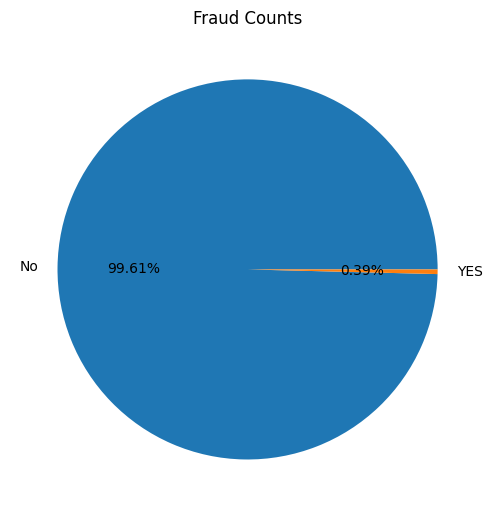

In [ ]:
fraud = df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "YES"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import resample
cls_0 = df[df["is_fraud"]==0]
cls_1 = df[df["is_fraud"]==1]
#Balancing data
cls_0 = resample(cls_0, replace=False, n_samples=len(cls_1))
down_samples = pd.concat([cls_1, cls_0], axis=0)

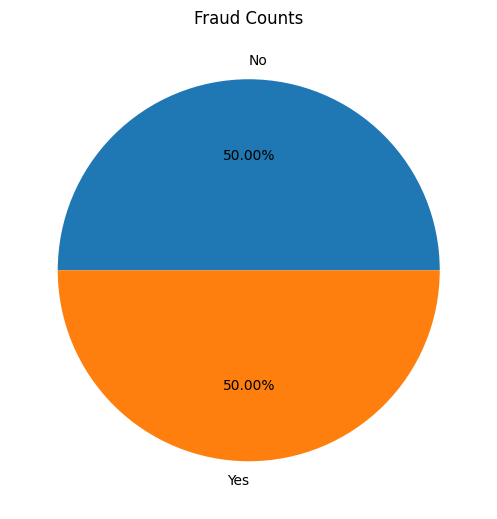

In [ ]:
fraud = down_samples["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "Yes"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [ ]:
X=df.drop(columns=['is_fraud', 'trans_date_trans_time', 'dob', 'trans_num'])
Y = df["is_fraud"]

In [ ]:
#X = df.drop(columns=["is_fraud"], inplace = False)
#Y = df["is_fraud"]

In [ ]:
X.shape

(50000, 19)

In [ ]:
Y.shape

(50000,)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (40000, 19) (40000,)
Test set: (10000, 19) (10000,)


In [ ]:
#implementation of multilayer perceptron
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [ ]:
#with 128 input nodes
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#with 64 input nodes
model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))


In [ ]:
#Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#for 128 input nodes with adam
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9956 - val_loss: 0.0175 - val_accuracy: 0.9957
Epoch 2/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0164 - accuracy: 0.9962 - val_loss: 0.0158 - val_accuracy: 0.9956
Epoch 3/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 0.0168 - val_accuracy: 0.9957
Epoch 4/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.0165 - val_accuracy: 0.9957
Epoch 5/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.0150 - val_accuracy: 0.9958
Epoch 6/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.0159 - val_accuracy: 0.9956
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0156 - val_accuracy:

In [ ]:
#for 64 input nodes with adam
model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0315 - accuracy: 0.9930 - val_loss: 0.0178 - val_accuracy: 0.9957
Epoch 2/5
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss: 0.0164 - val_accuracy: 0.9957
Epoch 3/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0161 - val_accuracy: 0.9957
Epoch 4/5
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.0159 - val_accuracy: 0.9958
Epoch 5/5
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.0150 - val_accuracy: 0.9960


In [ ]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
loss2, accuracy2 = model1.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy1)
print('Model accuracy(64 nodes): ', accuracy2)

313/313 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9960
Model accuracy(128 nodes):  0.9955999851226807
Model accuracy(64 nodes):  0.9959999918937683
